# 学习Faiss功能
本教程将分段介绍如何使用 `faiss-cpu` Python库。

## 安装Faiss
首先，确保已安装 `faiss-cpu` 库。

In [1]:
# 安装 faiss-cpu
!pip install faiss-cpu

## 基本使用
了解如何创建索引并添加向量。

In [2]:
# 导入Faiss库
import faiss
import numpy as np

# 创建随机向量数据
dimension = 128  # 向量维度
num_vectors = 1000  # 向量数量
data = np.random.random((num_vectors, dimension)).astype('float32')

# 创建索引
index = faiss.IndexFlatL2(dimension)  # L2距离
print("是否为索引训练状态:", index.is_trained)

# 添加向量到索引
index.add(data)
print("索引中的向量数量:", index.ntotal)

是否为索引训练状态: True
索引中的向量数量: 1000


# 分段学习faiss功能的Jupyter Notebook
使用faiss-cpu的Python库。

## 安装和导入Faiss
使用pip安装faiss-cpu库，并导入必要的模块。

In [3]:
# 安装 faiss-cpu
# 如果尚未安装，请取消注释以下代码行并运行
# !pip install faiss-cpu

# 导入必要的模块
import faiss
import numpy as np

## 创建简单的索引
使用faiss.IndexFlatL2创建一个简单的L2距离索引。

In [4]:
# 创建一个简单的L2距离索引
dimension = 128  # 向量的维度
index = faiss.IndexFlatL2(dimension)
print("是否为平面索引:", index.is_trained)

是否为平面索引: True


## 添加向量到索引
生成一些随机向量并将它们添加到索引中。

In [5]:
# 生成随机向量
num_vectors = 1000
vectors = np.random.random((num_vectors, dimension)).astype('float32')

# 添加向量到索引
index.add(vectors)
print("索引中的向量数量:", index.ntotal)

索引中的向量数量: 1000


## 搜索最近邻
使用索引的search方法查找给定查询向量的最近邻。

In [6]:
# 生成查询向量
query_vector = np.random.random((1, dimension)).astype('float32')

# 搜索最近邻
k = 5  # 查找前5个最近邻
distances, indices = index.search(query_vector, k)
print("最近邻的索引:", indices)
print("最近邻的距离:", distances)

最近邻的索引: [[977 273 763 739 893]]
最近邻的距离: [[11.932299 14.200732 14.224871 14.241714 14.325958]]


In [8]:
query_vector.shape

(1, 128)

In [14]:
import numpy as np
vec = np.random.random((128,))
print(vec.shape)


(128,)


## 使用多种索引类型
探索其他索引类型，例如IndexIVFFlat和IndexHNSWFlat，并比较它们的性能。

In [15]:
# 使用 IndexIVFFlat
quantizer = faiss.IndexFlatL2(dimension)  # 量化器
index_ivf = faiss.IndexIVFFlat(quantizer, dimension, 100)  # 100个聚类中心
index_ivf.train(vectors)
index_ivf.add(vectors)
print("IVF索引中的向量数量:", index_ivf.ntotal)

# 使用 IndexHNSWFlat
index_hnsw = faiss.IndexHNSWFlat(dimension, 32)  # 32为HNSW的连接参数
index_hnsw.add(vectors)
print("HNSW索引中的向量数量:", index_hnsw.ntotal)

IVF索引中的向量数量: 1000
HNSW索引中的向量数量: 1000


## 保存和加载索引
演示如何将索引保存到文件以及从文件加载索引。

In [16]:
# 保存索引到文件
faiss.write_index(index, "flat_index.faiss")
faiss.write_index(index_ivf, "ivf_index.faiss")
faiss.write_index(index_hnsw, "hnsw_index.faiss")

# 从文件加载索引
loaded_index = faiss.read_index("flat_index.faiss")
print("加载的索引中的向量数量:", loaded_index.ntotal)

加载的索引中的向量数量: 1000


## 索引类型详解
Faiss提供多种索引类型，每种适用于不同场景，下面详细介绍几种常用索引及其特点。

In [17]:
# 索引类型详解
import faiss
import numpy as np
import time

# 创建一个较大的数据集，用于比较不同索引
dimension = 128
num_vectors = 10000
large_vectors = np.random.random((num_vectors, dimension)).astype('float32')
query_vectors = np.random.random((5, dimension)).astype('float32')

# 1. IndexFlatL2 - 暴力搜索，准确但较慢
index_flat = faiss.IndexFlatL2(dimension)
index_flat.add(large_vectors)

# 2. IndexIVFFlat - 倒排文件索引，快速但近似
nlist = 100  # 聚类中心数量
quantizer = faiss.IndexFlatL2(dimension)
index_ivf = faiss.IndexIVFFlat(quantizer, dimension, nlist)
index_ivf.train(large_vectors)
index_ivf.add(large_vectors)
# 设置搜索时检查的聚类数量
index_ivf.nprobe = 10  # 默认为1，增加这个值可以提高准确度，但会降低速度

# 3. IndexPQ - 产品量化，更快速和更节省内存，但精度较低
m = 8  # 子量化器数量
nbits = 8  # 每个子量化器的位数
index_pq = faiss.IndexPQ(dimension, m, nbits)
index_pq.train(large_vectors)
index_pq.add(large_vectors)

# 4. IndexHNSWFlat - 层次可导航小世界图，高速高精度
M = 16  # HNSW图中的最大连接数
ef_construction = 200  # 构建时的探索因子
index_hnsw = faiss.IndexHNSWFlat(dimension, M)
index_hnsw.hnsw.efConstruction = ef_construction
index_hnsw.add(large_vectors)
index_hnsw.hnsw.efSearch = 128  # 搜索时的探索因子

# 比较不同索引的搜索性能
k = 5  # 搜索最近邻数量
results = {}

print("各索引类型搜索性能比较:")
print("-" * 50)

# 测试 IndexFlatL2
start_time = time.time()
distances_flat, indices_flat = index_flat.search(query_vectors, k)
flat_time = time.time() - start_time
print(f"IndexFlatL2 搜索时间: {flat_time:.5f} 秒")

# 测试 IndexIVFFlat
start_time = time.time()
distances_ivf, indices_ivf = index_ivf.search(query_vectors, k)
ivf_time = time.time() - start_time
print(f"IndexIVFFlat 搜索时间: {ivf_time:.5f} 秒")

# 测试 IndexPQ
start_time = time.time()
distances_pq, indices_pq = index_pq.search(query_vectors, k)
pq_time = time.time() - start_time
print(f"IndexPQ 搜索时间: {pq_time:.5f} 秒")

# 测试 IndexHNSWFlat
start_time = time.time()
distances_hnsw, indices_hnsw = index_hnsw.search(query_vectors, k)
hnsw_time = time.time() - start_time
print(f"IndexHNSWFlat 搜索时间: {hnsw_time:.5f} 秒")

print("\n各索引类型相对于暴力搜索的加速比:")
print(f"IndexIVFFlat: {flat_time/ivf_time:.2f}x")
print(f"IndexPQ: {flat_time/pq_time:.2f}x")
print(f"IndexHNSWFlat: {flat_time/hnsw_time:.2f}x")

各索引类型搜索性能比较:
--------------------------------------------------
IndexFlatL2 搜索时间: 0.00000 秒
IndexIVFFlat 搜索时间: 0.00200 秒
IndexPQ 搜索时间: 0.00251 秒
IndexHNSWFlat 搜索时间: 0.00106 秒

各索引类型相对于暴力搜索的加速比:
IndexIVFFlat: 0.00x
IndexPQ: 0.00x
IndexHNSWFlat: 0.00x


## 向量规范化与相似度度量
Faiss支持多种距离度量方式，如L2欧氏距离和内积相似度。向量规范化对于使用内积计算相似度非常重要。

In [18]:
# 向量规范化示例
import numpy as np
import faiss

# 创建随机向量
dimension = 128
num_vectors = 1000
vectors = np.random.random((num_vectors, dimension)).astype('float32')

# 向量规范化
# L2归一化 - 每个向量的L2范数为1
faiss.normalize_L2(vectors)  # 原地归一化

# 验证归一化效果
norms = np.linalg.norm(vectors, axis=1)
print(f"向量规范化后的L2范数: 最小={norms.min():.5f}, 最大={norms.max():.5f}, 平均={norms.mean():.5f}")

# 创建内积索引 (对归一化向量使用内积等价于余弦相似度)
index_ip = faiss.IndexFlatIP(dimension)  # IP表示内积 (Inner Product)
index_ip.add(vectors)

# 生成查询向量并归一化
query = np.random.random((1, dimension)).astype('float32')
faiss.normalize_L2(query)

# 使用内积索引搜索
k = 5
distances_ip, indices_ip = index_ip.search(query, k)
print("\n内积相似度搜索结果:")
print(f"最相似向量的索引: {indices_ip[0]}")
print(f"相似度分数: {distances_ip[0]}")
print("注意: 内积越大，向量越相似")

# 创建L2距离索引进行对比
index_l2 = faiss.IndexFlatL2(dimension)
index_l2.add(vectors)
distances_l2, indices_l2 = index_l2.search(query, k)
print("\nL2距离搜索结果:")
print(f"最相似向量的索引: {indices_l2[0]}")
print(f"距离分数: {distances_l2[0]}")
print("注意: L2距离越小，向量越相似")

向量规范化后的L2范数: 最小=1.00000, 最大=1.00000, 平均=1.00000

内积相似度搜索结果:
最相似向量的索引: [634 840 329 680 974]
相似度分数: [0.85367084 0.84767574 0.83916736 0.83827686 0.8380629 ]
注意: 内积越大，向量越相似

L2距离搜索结果:
最相似向量的索引: [634 840 329 680 974]
距离分数: [0.29265845 0.3046487  0.32166547 0.32344642 0.3238744 ]
注意: L2距离越小，向量越相似


## 批量查询与高效检索
在实际应用中，经常需要同时查询多个向量，批量处理可以提高效率。

In [21]:
# 批量查询示例
import numpy as np
import faiss
import time

# 创建数据集
dimension = 128
num_vectors = 10000
db_vectors = np.random.random((num_vectors, dimension)).astype('float32')

# 创建索引
index = faiss.IndexFlatL2(dimension)
index.add(db_vectors)

# 创建不同大小的查询批次
batch_sizes = [1, 10, 100, 1000]
k = 5

print("批量查询性能比较:")
print("-" * 40)

for batch_size in batch_sizes:
    query_batch = np.random.random((batch_size, dimension)).astype('float32')
    
    # 批量查询
    start_time = time.time()
    distances, indices = index.search(query_batch, k)
    batch_time = max(time.time() - start_time, 1e-6)  # 防止除零错误
    
    # 单个查询（循环方式）
    start_time = time.time()
    individual_results = []
    for i in range(batch_size):
        single_query = query_batch[i:i+1]
        d, ind = index.search(single_query, k)
        individual_results.append((d, ind))
    individual_time = time.time() - start_time
    
    print(f"批次大小: {batch_size}")
    print(f"  批量查询时间: {batch_time:.5f} 秒")
    print(f"  单个循环查询时间: {individual_time:.5f} 秒")
    if batch_time > 0:
        print(f"  加速比: {individual_time/batch_time:.2f}x")
    else:
        print(f"  加速比: 无法计算 (批量查询时间太短)")
    print("")


批量查询性能比较:
----------------------------------------
批次大小: 1
  批量查询时间: 0.00000 秒
  单个循环查询时间: 0.00100 秒
  加速比: 998.74x

批次大小: 10
  批量查询时间: 0.00000 秒
  单个循环查询时间: 0.00248 秒
  加速比: 2479.55x

批次大小: 100
  批量查询时间: 0.01975 秒
  单个循环查询时间: 0.02093 秒
  加速比: 1.06x

批次大小: 1000
  批量查询时间: 0.05130 秒
  单个循环查询时间: 0.12225 秒
  加速比: 2.38x

批次大小: 1000
  批量查询时间: 0.05130 秒
  单个循环查询时间: 0.12225 秒
  加速比: 2.38x



## 构建复合索引
Faiss允许构建复杂的复合索引来平衡速度和精度。

In [22]:
# 构建复合索引示例
import faiss
import numpy as np
import time

# 创建数据集
dimension = 128
num_vectors = 10000
vectors = np.random.random((num_vectors, dimension)).astype('float32')
query = np.random.random((5, dimension)).astype('float32')

# 1. 构建IVF+PQ复合索引 (常用于大规模数据)
# 这种索引首先使用IVF (倒排文件) 进行粗搜索，然后在聚类内使用PQ (产品量化) 进行精搜索
nlist = 100  # IVF聚类中心数量
m = 8        # PQ子空间数量
nbits = 8    # PQ每个子空间的位数

quantizer = faiss.IndexFlatL2(dimension)
index_ivfpq = faiss.IndexIVFPQ(quantizer, dimension, nlist, m, nbits)

# 训练索引
print("训练IVF+PQ索引...")
index_ivfpq.train(vectors)
index_ivfpq.add(vectors)

# 设置搜索参数
index_ivfpq.nprobe = 10  # 搜索时检查的聚类数量

# 2. 构建多层索引 - 使用IVF和Flat的组合
index_ivfflat = faiss.IndexIVFFlat(faiss.IndexFlatL2(dimension), dimension, nlist)
print("训练IVF+Flat索引...")
index_ivfflat.train(vectors)
index_ivfflat.add(vectors)
index_ivfflat.nprobe = 10

# 测试搜索性能
k = 5
print("\n复合索引性能比较:")
print("-" * 40)

# 评估IVF+PQ
start_time = time.time()
distances_ivfpq, indices_ivfpq = index_ivfpq.search(query, k)
ivfpq_time = time.time() - start_time
print(f"IVF+PQ搜索时间: {ivfpq_time:.5f} 秒")

# 评估IVF+Flat
start_time = time.time()
distances_ivfflat, indices_ivfflat = index_ivfflat.search(query, k)
ivfflat_time = time.time() - start_time
print(f"IVF+Flat搜索时间: {ivfflat_time:.5f} 秒")

# 比较结果的精度
# 使用暴力搜索结果作为基准
index_flat = faiss.IndexFlatL2(dimension)
index_flat.add(vectors)
_, indices_flat = index_flat.search(query, k)

def calculate_recall(reference_indices, test_indices):
    """计算召回率 - 正确找回的比例"""
    recall = 0
    for ref_row, test_row in zip(reference_indices, test_indices):
        recall += len(set(ref_row) & set(test_row)) / len(ref_row)
    return recall / len(reference_indices)

recall_ivfpq = calculate_recall(indices_flat, indices_ivfpq)
recall_ivfflat = calculate_recall(indices_flat, indices_ivfflat)

print(f"\nIVF+PQ召回率: {recall_ivfpq:.2f}")
print(f"IVF+Flat召回率: {recall_ivfflat:.2f}")
print("\n注: 召回率越高表示搜索结果越接近暴力搜索的精确结果")

print("\n复合索引的选择建议:")
print("- IVF+Flat: 当需要较高精度且内存足够时")
print("- IVF+PQ: 当需要处理超大规模数据且内存受限时")

训练IVF+PQ索引...
训练IVF+Flat索引...

复合索引性能比较:
----------------------------------------
IVF+PQ搜索时间: 0.00200 秒
IVF+Flat搜索时间: 0.00000 秒

IVF+PQ召回率: 0.08
IVF+Flat召回率: 0.32

注: 召回率越高表示搜索结果越接近暴力搜索的精确结果

复合索引的选择建议:
- IVF+Flat: 当需要较高精度且内存足够时
- IVF+PQ: 当需要处理超大规模数据且内存受限时
训练IVF+Flat索引...

复合索引性能比较:
----------------------------------------
IVF+PQ搜索时间: 0.00200 秒
IVF+Flat搜索时间: 0.00000 秒

IVF+PQ召回率: 0.08
IVF+Flat召回率: 0.32

注: 召回率越高表示搜索结果越接近暴力搜索的精确结果

复合索引的选择建议:
- IVF+Flat: 当需要较高精度且内存足够时
- IVF+PQ: 当需要处理超大规模数据且内存受限时


## 索引参数调优
索引参数对性能和精度有很大影响，下面展示如何调优一些关键参数。

nprobe=1: 召回率=0.0500, 搜索时间=0.00100秒
nprobe=5: 召回率=0.2800, 搜索时间=0.00099秒
nprobe=10: 召回率=0.3400, 搜索时间=0.00000秒
nprobe=20: 召回率=0.5200, 搜索时间=0.00000秒
nprobe=50: 召回率=0.8500, 搜索时间=0.00000秒
nprobe=100: 召回率=1.0000, 搜索时间=0.00100秒


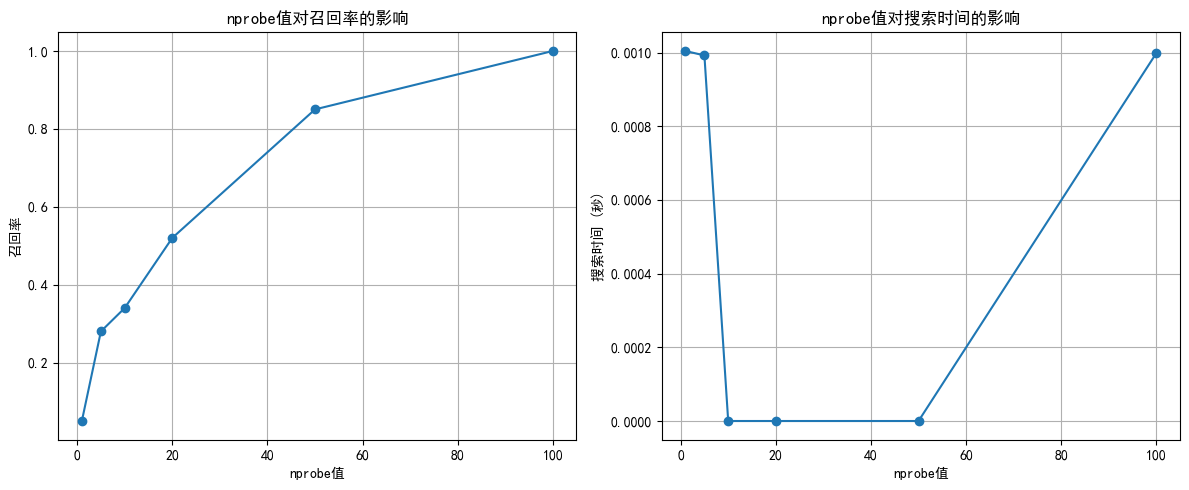

In [24]:
# 索引参数调优示例
import faiss
import numpy as np
import time
import matplotlib.pyplot as plt
# 配置simhei字体以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
# 创建数据集
dimension = 128
num_vectors = 10000
vectors = np.random.random((num_vectors, dimension)).astype('float32')
query = np.random.random((10, dimension)).astype('float32')

# 创建参考索引（精确搜索）
index_flat = faiss.IndexFlatL2(dimension)
index_flat.add(vectors)
_, indices_ref = index_flat.search(query, 10)  # 获取真实的前10个结果

# 调优IVF索引的nprobe参数
nlist = 100
quantizer = faiss.IndexFlatL2(dimension)
index_ivf = faiss.IndexIVFFlat(quantizer, dimension, nlist)
index_ivf.train(vectors)
index_ivf.add(vectors)

# 测试不同的nprobe值
nprobe_values = [1, 5, 10, 20, 50, 100]
recalls = []
search_times = []

for nprobe in nprobe_values:
    index_ivf.nprobe = nprobe
    
    # 计时搜索
    start_time = time.time()
    _, indices = index_ivf.search(query, 10)
    elapsed = time.time() - start_time
    search_times.append(elapsed)
    
    # 计算召回率
    recall = 0
    for i in range(len(query)):
        recall += len(set(indices[i]) & set(indices_ref[i])) / 10
    recall /= len(query)
    recalls.append(recall)
    
    print(f"nprobe={nprobe}: 召回率={recall:.4f}, 搜索时间={elapsed:.5f}秒")

# 可视化nprobe与召回率/搜索时间的关系
try:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(nprobe_values, recalls, 'o-')
    plt.xlabel('nprobe值')
    plt.ylabel('召回率')
    plt.title('nprobe值对召回率的影响')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(nprobe_values, search_times, 'o-')
    plt.xlabel('nprobe值')
    plt.ylabel('搜索时间 (秒)')
    plt.title('nprobe值对搜索时间的影响')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
except ImportError:
    print("提示: 需要安装matplotlib库来显示图表")


## 高级操作：向量更新和删除
Faiss部分索引支持向量的动态更新和删除。

In [25]:
# 向量更新和删除示例
import faiss
import numpy as np

# 创建数据集
dimension = 128
num_vectors = 1000
vectors = np.random.random((num_vectors, dimension)).astype('float32')

# 创建索引 - 使用IDMap包装器以支持通过ID管理向量
index = faiss.IndexFlatL2(dimension)  # 基础索引
id_map_index = faiss.IndexIDMap(index)  # 包装基础索引以支持ID映射

# 创建ID数组
ids = np.arange(num_vectors).astype('int64')  # ID必须是int64类型

# 添加带ID的向量
id_map_index.add_with_ids(vectors, ids)
print(f"索引中的向量数量: {id_map_index.ntotal}")

# 查询示例
query = np.random.random((1, dimension)).astype('float32')
k = 5
distances, retrieved_ids = id_map_index.search(query, k)
print(f"\n查询结果的ID: {retrieved_ids[0]}")
print(f"距离: {distances[0]}")

# 删除部分向量
ids_to_remove = np.array([0, 10, 20, 30, 40], dtype='int64')
id_map_index.remove_ids(ids_to_remove)
print(f"\n删除后的索引向量数量: {id_map_index.ntotal}")

# 重新查询验证删除效果
distances, retrieved_ids = id_map_index.search(query, k)
print(f"删除后的查询结果ID: {retrieved_ids[0]}")
print(f"删除的ID {ids_to_remove} 是否出现在结果中: {any(id in ids_to_remove for id in retrieved_ids[0])}")

# 注意: 要支持向量更新，需要先删除旧向量，然后添加新向量
print("\n执行向量更新 (先删除再添加):")
update_id = np.array([50], dtype='int64')
update_vector = np.random.random((1, dimension)).astype('float32')

# 删除旧向量
id_map_index.remove_ids(update_id)
# 添加新向量（使用相同的ID）
id_map_index.add_with_ids(update_vector, update_id)

print("向量更新完成!")

# 注意：并非所有索引类型都支持删除操作
print("\n支持删除操作的索引类型:")
print("- IndexFlat (通过IDMap包装)")
print("- IndexIVF及其变体 (直接支持)")
print("不支持删除操作的索引类型:")
print("- IndexHNSW")
print("- 大多数不可变索引结构")

索引中的向量数量: 1000

查询结果的ID: [291  45 455 998 111]
距离: [14.496877 15.776328 16.025974 16.127321 16.36466 ]

删除后的索引向量数量: 995
删除后的查询结果ID: [291  45 455 998 111]
删除的ID [ 0 10 20 30 40] 是否出现在结果中: False

执行向量更新 (先删除再添加):
向量更新完成!

支持删除操作的索引类型:
- IndexFlat (通过IDMap包装)
- IndexIVF及其变体 (直接支持)
不支持删除操作的索引类型:
- IndexHNSW
- 大多数不可变索引结构


## 实际应用：文本向量搜索
结合句子嵌入模型和Faiss实现简单的文本搜索系统。

In [ ]:
# 文本向量搜索应用示例
# 注意：此示例需要sentence-transformers库，如果未安装请先执行:
# !pip install sentence-transformers

try:
    import faiss
    import numpy as np
    from sentence_transformers import SentenceTransformer
    
    # 加载预训练的句子编码模型
    print("加载句子编码模型...")
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # 轻量级多语言模型
    
    # 示例文本集合
    texts = [
        "人工智能是计算机科学的一个分支",
        "深度学习是机器学习的子领域",
        "向量搜索可以高效查找相似内容",
        "自然语言处理用于理解人类语言",
        "计算机视觉用于处理和分析图像",
        "强化学习是通过奖励信号来学习决策",
        "知识图谱表示实体之间的关系",
        "推荐系统帮助用户发现感兴趣的内容",
        "聊天机器人是一种人工智能应用",
        "神经网络模拟人脑的结构和功能"
    ]
    
    # 将文本转换为向量
    print("将文本编码为向量...")
    embeddings = model.encode(texts, convert_to_numpy=True)
    embeddings = embeddings.astype(np.float32)  # Faiss需要float32类型
    
    print(f"生成的向量维度: {embeddings.shape}")
    
    # 创建Faiss索引
    dimension = embeddings.shape[1]
    index = faiss.IndexFlatL2(dimension)
    
    # 将向量添加到索引
    index.add(embeddings)
    
    # 定义搜索函数
    def search_similar_texts(query_text, top_k=3):
        # 将查询文本转换为向量
        query_vector = model.encode([query_text], convert_to_numpy=True).astype(np.float32)
        
        # 搜索最相似的向量
        distances, indices = index.search(query_vector, top_k)
        
        # 返回结果
        results = []
        for i, idx in enumerate(indices[0]):
            results.append({
                "text": texts[idx],
                "distance": float(distances[0][i]),
                "similarity": 1 / (1 + float(distances[0][i]))  # 将距离转换为相似度分数
            })
        return results
    
    # 测试搜索
    print("\n执行文本相似性搜索:")
    queries = [
        "机器学习的应用",
        "如何处理图像数据",
        "智能助手与对话系统"
    ]
    
    for query in queries:
        print(f"\n查询: '{query}'")
        results = search_similar_texts(query)
        for i, result in enumerate(results):
            print(f"{i+1}. {result['text']} (相似度: {result['similarity']:.4f})")
    
    print("\n这个示例展示了如何将Faiss与文本嵌入模型结合，实现语义搜索功能。")
    print("在实际应用中，您可以:")
    print("1. 存储更多的文档/段落")
    print("2. 使用更高级的索引类型处理大规模数据")
    print("3. 结合预处理和后处理提高搜索质量")
    print("4. 保存索引和ID映射以便持久化使用")

except ImportError:
    print("要运行此示例，请先安装sentence-transformers库:")
    print("!pip install sentence-transformers")

## 总结

本教程介绍了Faiss库的多种功能和高级用法：

1. **不同索引类型**：从简单的FlatL2到复杂的IVF+PQ组合
2. **向量规范化**：在使用内积相似度时的重要性
3. **批量处理**：提高查询效率的方法
4. **复合索引构建**：平衡查询速度和精度的策略
5. **参数调优**：优化索引性能的关键参数
6. **向量更新和删除**：动态维护索引的方法
7. **实际应用**：如何将Faiss应用于文本语义搜索

在选择和配置Faiss索引时，需要根据应用场景权衡速度、内存使用和召回率等因素。较大的数据集通常需要使用更复杂的索引结构，如IVF+PQ或HNSW，以实现高效检索。